<a href="https://colab.research.google.com/github/mahi97/MahiColabs/blob/master/PolyRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# %% Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

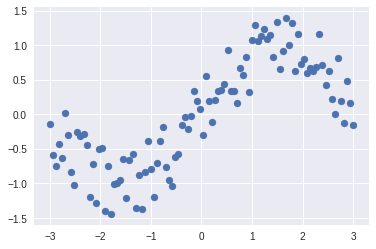

In [22]:
plt.ion()
n_observation = 100
fig, ax = plt.subplots(1,1)
xs = np.linspace(-3, 3, n_observation)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observation)
plt.scatter(xs,ys)
plt.show()

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [0]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 5):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

In [0]:
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observation - 1)


In [0]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

121.10608
46.44462
22.380949
13.824609
10.414988
8.893927
8.142193
7.7332344
7.4872484
7.3221745
7.198433
7.0962687
7.0056715
6.921478
6.84102
6.762897
6.6864133
6.611151
6.5369096
6.4635806
6.3910885
6.319418
6.2485
6.1783466
6.108921
6.0402117
5.972223
5.904926
5.8383255
5.7724066
5.707154
5.642568
5.57863
5.515351
5.4527054
5.390711
5.3293376
5.2685847
5.208446
5.148928
5.0900106
5.03169
4.97397
4.91683
4.860276
4.804308
4.7489104
4.6940746
4.6398096
4.5861053
4.5329604
4.480364
4.428319
4.376818
4.3258624
4.2754374
4.225541
4.176173
4.1273327
4.079009
4.031198
3.9839036
3.9371145
3.8908296
3.8450422
3.7997522
3.7549527
3.7106435
3.666814
3.6234708
3.5806003
3.538208
3.4962783
3.454814
3.4138145
3.3732672
3.333178
3.293535
3.2543375
3.21558
3.1772609
3.139377
3.101921
3.0648916
3.0282888
2.992101
2.9563293
2.9209692
2.8860154
2.8514667
2.817319
2.7835617
2.7501988
2.717221
2.6846313
2.6524198
2.6205885
2.5891304
2.558042
2.52732
2.4969573
2.466955
2.437309
2.408015
2.379067
2.350464

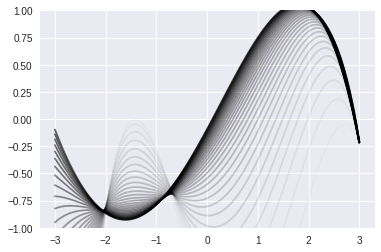

In [27]:
# %% We create a session to use the graph
n_epochs = 1000
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        training_cost = sess.run(
            cost, feed_dict={X: xs, Y: ys})
        print(training_cost)

        if epoch_i % 20 == 0:
            plt.plot(xs, Y_pred.eval(
                feed_dict={X: xs}, session=sess),
                    'k', alpha=epoch_i / n_epochs)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
plt.ylim(-1,1)
plt.show()
